In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/Users/shinigami/Documents/Machine learning/project/Housing/datasets/housing/housing.csv", index_col = None)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 12, titlesize = 14)
plt.rc("legend",fontsize = 12)
plt.rc("xtick", labelsize = 10)
plt.rc("ytick", labelsize = 10)

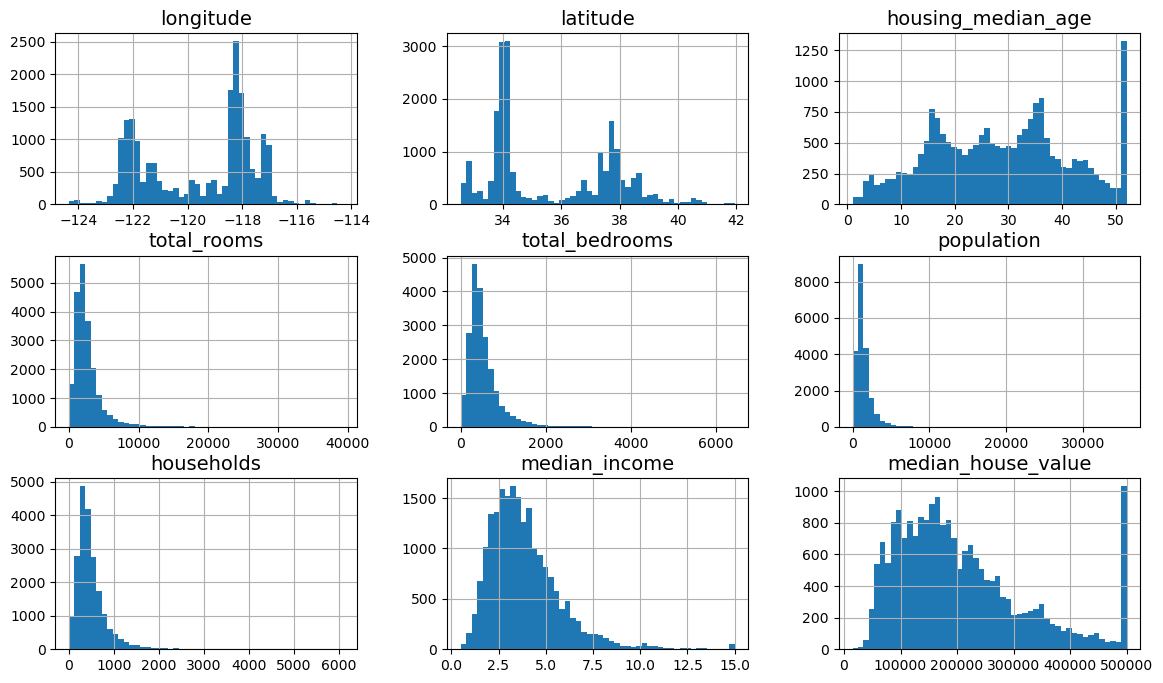

In [7]:
data.hist(bins = 50, figsize = (14,8))
plt.show()

In [8]:
data["income_cat"] = pd.cut(data["median_income"],
                           bins = [0., 1.5, 3, 4.5, 6, np.inf],
                           labels = [1, 2, 3, 4, 5])

In [9]:
# def train_test_split(data, test_ratio, stratify_by, seed):
#     if seed is not None:
#         np.random.seed(seed)
#     if stratify_by not in data.columns:
#         raise ValueError(f"{stratify_by} column not found in the data.")
#     test_indices = []
#     train_indices = []
#     for label in data[stratify_by].unique():
#         label_indices = data[data[stratify_by] == label].index
#         random_indices = np.random.permutation(label_indices)
#         test_size = int(len(random_indices) * test_ratio)
#         if test_size < 1:
#             test_size = 1
#         test_indices.extend(random_indices[:test_size])
#         train_indices.extend(random_indices[test_size:])
        
#     return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 42, stratify = data["income_cat"])

In [11]:
data = train_data.copy()

In [12]:
corr_matrix = data.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [13]:
data["bedroom_ratio"] = data["total_rooms"]/data["total_bedrooms"]
data["room_per_household"] = data["total_rooms"]/ data["households"]
data["people_per_house"] = data["population"]/ data["households"]

In [14]:
corr_matrix = data.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
bedroom_ratio         0.380920
room_per_household    0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

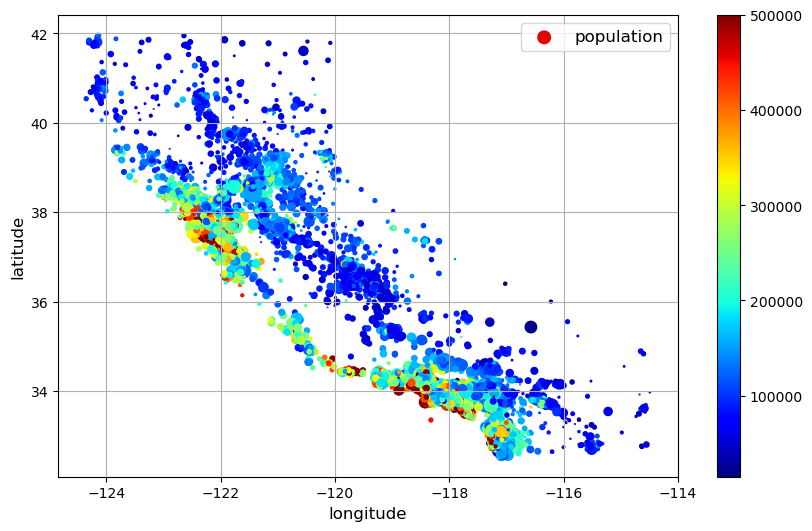

In [15]:
data.plot(kind = "scatter", x = "longitude", y = "latitude", s = data["population"]/100,
         c = data["median_house_value"], label = "population", cmap = "jet",
          sharex = False, colorbar = True, legend = True, figsize = (10,6), grid = True)

In [16]:
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output = 'pandas')

In [17]:
imputer = SimpleImputer(strategy = 'median')
data = imputer.fit_transform(data.select_dtypes(include = [np.number]))